In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scdna_replication_tools.plot_utils import get_clone_cmap, get_phase_cmap

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 8

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True

despine_offset = 10
despine_trim = True

In [3]:
def get_site_cmap():
    cmap = {
        'SPECTRUM-OV-081_S1_LEFT_ADNEXA': 'powderblue',
        'SPECTRUM-OV-081_S1_INFRACOLIC_OMENTUM': 'darkseagreen',
    }
    return cmap

### Load and plot data showing the distribution of scRNA cell cycle phases at the two different sites

In [4]:
scrna_df = pd.read_csv('scdna_replication_paper/data/spectrum/SPECTRUM-OV-081_cell_cycle_meta.csv')

# count the number of cells within each site & phase combination
count_df = scrna_df[['site', 'Phase']].value_counts().reset_index().rename(columns={0: 'num_cells', 'Phase': 'phase'}).sort_values(by=['site', 'phase']).reset_index(drop=True)
count_df

,site,phase,num_cells
0,INFRACOLIC_OMENTUM,G1,1885
1,INFRACOLIC_OMENTUM,G2M,472
2,INFRACOLIC_OMENTUM,S,449
3,LEFT_ADNEXA,G1,1455
4,LEFT_ADNEXA,G2M,962
5,LEFT_ADNEXA,S,691


In [5]:

def plot_scrna_phase_pie(count_df, ax0, ax1):
    # plot the distribution of cell cycle phases for each site as pie charts
    cmap = get_phase_cmap()
    ax0.pie(count_df.query('site=="LEFT_ADNEXA"')['num_cells'], labels=count_df.query('site=="LEFT_ADNEXA"')['phase'], autopct='%1.1f%%', shadow=True, startangle=90, colors=[cmap[x] for x in count_df.query('site=="LEFT_ADNEXA"')['phase']])
    ax1.pie(count_df.query('site=="INFRACOLIC_OMENTUM"')['num_cells'], labels=count_df.query('site=="INFRACOLIC_OMENTUM"')['phase'], autopct='%1.1f%%', shadow=True, startangle=90, colors=[cmap[x] for x in count_df.query('site=="INFRACOLIC_OMENTUM"')['phase']])

    ax0.set_title('Left adnexa (primary)\nNGD clones dominant')
    ax1.set_title('Infracolic omentum (met)\nWGD clone dominant')


### Load data to show S-phase enrichment plots for each clone and site combination

In [6]:
df = pd.read_csv('scdna_replication_paper/analysis/spectrum/{dataset}/cell_cycle_clone_counts.csv.gz'.format(dataset='SPECTRUM-OV-081'))
df.head()

,clone_id,num_cells_s,num_cells_g,clone_frac_s,clone_frac_g,positive_p,negative_p,library_id,positive_p_adj,negative_p_adj
0,A,4.0,0.0,0.009153,0.000000,0.000000e+00,1.000000e+00,128673A,0.000000e+00,2.800000e+01
1,B,4.0,0.0,0.009153,0.000000,0.000000e+00,1.000000e+00,128673A,0.000000e+00,2.800000e+01
2,C,248.0,74.0,0.567506,0.493333,7.376205e-11,1.000000e+00,128673A,2.065337e-09,2.800000e+01
3,D,162.0,67.0,0.370709,0.446667,1.000000e+00,2.665662e-10,128673A,2.800000e+01,7.463854e-09
4,E,5.0,0.0,0.011442,0.000000,0.000000e+00,1.000000e+00,128673A,0.000000e+00,2.800000e+01


In [7]:
# delete clone B from the S-phase population and then move all clones up one index (C->B, D->C, etc.) with the exception of clone A
df = df.loc[df['clone_id'] != 'B']
clone_remap_081 = {'C': 'B', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'F',}
df['clone_id'] = df['clone_id'].replace(clone_remap_081)

In [8]:
# add a column to df that maps library_id 128673A to LEFT_ADNEXA and 128689A to INFRACOLIC_OMENTUM
df['site'] = df['library_id'].map({'128673A': 'SPECTRUM-OV-081_S1_LEFT_ADNEXA', '128689A': 'SPECTRUM-OV-081_S1_INFRACOLIC_OMENTUM'})

# drop the 'all' library by removing NaNs
df = df.dropna(subset=['site'])

df.head()

,clone_id,num_cells_s,num_cells_g,clone_frac_s,clone_frac_g,positive_p,negative_p,library_id,positive_p_adj,negative_p_adj,site
0,A,4.0,0.0,0.009153,0.000000,0.000000e+00,1.000000e+00,128673A,0.000000e+00,2.800000e+01,SPECTRUM-OV-081_S1_LEFT_ADNEXA
2,B,248.0,74.0,0.567506,0.493333,7.376205e-11,1.000000e+00,128673A,2.065337e-09,2.800000e+01,SPECTRUM-OV-081_S1_LEFT_ADNEXA
3,C,162.0,67.0,0.370709,0.446667,1.000000e+00,2.665662e-10,128673A,2.800000e+01,7.463854e-09,SPECTRUM-OV-081_S1_LEFT_ADNEXA
4,D,5.0,0.0,0.011442,0.000000,0.000000e+00,1.000000e+00,128673A,0.000000e+00,2.800000e+01,SPECTRUM-OV-081_S1_LEFT_ADNEXA
5,E,5.0,0.0,0.011442,0.000000,0.000000e+00,1.000000e+00,128673A,0.000000e+00,2.800000e+01,SPECTRUM-OV-081_S1_LEFT_ADNEXA


In [9]:
def plot_s_phase_enrichment(df, dataset, ax0, ax1, pt_size=5):
    pthresh = 1e-2

    # create custom legend for clones & timepoints
    clone_cmap = get_clone_cmap()
    site_cmap = get_site_cmap()
    clone_legend_elements = [
        Line2D([0], [0], marker='^', color='w', label='enriched'.format(pthresh), markerfacecolor='k', markersize=pt_size),
        Line2D([0], [0], marker='v', color='w', label='depleted'.format(pthresh), markerfacecolor='k', markersize=pt_size)
    ]
    # site_legend_elements = clone_legend_elements.copy()
    for i, c in enumerate(sorted(df.clone_id.unique())):
        color = clone_cmap[c]
        clone_legend_elements.append(Patch(facecolor=color, label=c))

    site_legend_elements = []
    for i, s in enumerate(df.site.unique()):
        color = site_cmap[s]
        site_str = s.replace('SPECTRUM-OV-081_S1_', '').replace('_', ' ').lower()
        site_legend_elements.append(Patch(facecolor=color, label=site_str))

    # draw scatterplot comparing the relative fraction of each clone in S vs G1/2 phases
    for i, row in df.iterrows():
        clone_id = row['clone_id']
        site = row['site']
        if row['positive_p_adj'] < pthresh:
            ax0.scatter(x=row['clone_frac_g'], y=row['clone_frac_s'], color=clone_cmap[clone_id], marker='^', s=pt_size)
            ax1.scatter(x=row['clone_frac_g'], y=row['clone_frac_s'], color=site_cmap[site], marker='^', s=pt_size)
        elif row['negative_p_adj'] < pthresh:
            ax0.scatter(x=row['clone_frac_g'], y=row['clone_frac_s'], color=clone_cmap[clone_id], marker='v', s=pt_size)
            ax1.scatter(x=row['clone_frac_g'], y=row['clone_frac_s'], color=site_cmap[site], marker='v', s=pt_size)
        else:
            ax0.scatter(x=row['clone_frac_g'], y=row['clone_frac_s'], color=clone_cmap[clone_id], s=pt_size)
            ax1.scatter(x=row['clone_frac_g'], y=row['clone_frac_s'], color=site_cmap[site], s=pt_size)

    # draw y=x line where we expect "neutral" clones to lie
    lims = [
        np.min([ax0.get_xlim(), ax0.get_ylim()]),  # min of both axes
        np.max([ax0.get_xlim(), ax0.get_ylim()]),  # max of both axes
    ]
    ax0.plot(lims, lims, 'k--', alpha=0.25, zorder=0)
    ax1.plot(lims, lims, 'k--', alpha=0.25, zorder=0)

    # ax0.legend(handles=clone_legend_elements, title='clone')
    ax0.legend(handles=clone_legend_elements, title='clone ID', frameon=False, loc='upper left')
    ax1.legend(handles=site_legend_elements, title='site', frameon=False, loc='upper left')
    ax0.set_title('{}: S-phase enrichment\ncolored by clone'.format(dataset))
    ax1.set_title('{}: S-phase enrichment\ncolored by site'.format(dataset))
    ax0.set_ylabel('S-phase clone fraction')
    for ax in [ax0, ax1]:
        ax.set_xlabel('G1/2-phase clone fraction')
        sns.despine(ax=ax, offset=despine_offset, trim=despine_trim)

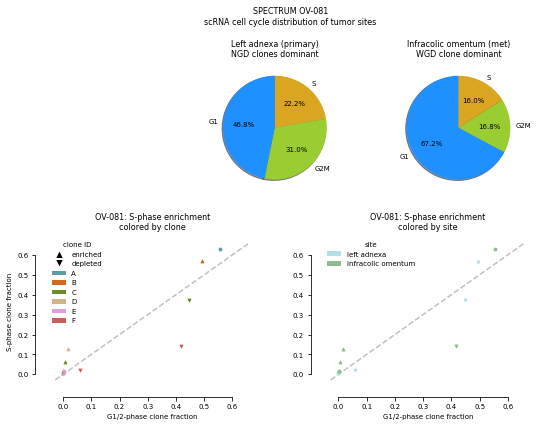

In [14]:
fig = plt.figure(figsize=(8.5, 6))

ax0 = fig.add_axes([0.35, 0.55, 0.25, 0.3])
ax1 = fig.add_axes([0.65, 0.55, 0.25, 0.3])
ax2 = fig.add_axes([0.1, 0.1, 0.35, 0.35])
ax3 = fig.add_axes([0.55, 0.1, 0.35, 0.35])

fig.suptitle('SPECTRUM OV-081\nscRNA cell cycle distribution of tumor sites')

plot_scrna_phase_pie(count_df, ax0, ax1)

plot_s_phase_enrichment(df, 'OV-081', ax2, ax3, pt_size=8)

fig.savefig('scdna_replication_paper/manuscript/extended_data_figs/figED9.pdf', dpi=300, bbox_inches='tight')

plt.show()